<a href="https://colab.research.google.com/github/VittorioBartolomeoSecondin/DVIS-CAValli_Team/blob/main/Assignment1%20-%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and pre-processing

## Loading libraries and connecting to google drive

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
import csv

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the data

In [2]:
all_files = glob.glob("/content/drive/MyDrive/tree_dataset/*.csv")
all_files.sort()
print(all_files)

['/content/drive/MyDrive/tree_dataset/Albuquerque_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Anaheim_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Arlington_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Atlanta_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/AuroraCO_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Austin_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Baltimore_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Boston_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Buffalo_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/CapeCoral_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/ColoradoSprings_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Columbus_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Dallas_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Denver_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_da

In [3]:
city_list = ['Albuquerque', 'Anaheim', 'Atlanta', 'Aurora', 'Arlington', 'Baltimore', 'Cape Coral', 'Buffalo', 'Boston', 'Austin', 'Denver',
 'Colorado Springs', 'Columbus', 'Dallas', 'Garden Grove', 'Des Moines', 'Durham', 'Grand Rapids', 'Fresno', 'Detroit', 'Honolulu',
 'Huntington Beach', 'Irvine', 'Greensboro', 'Houston', 'Indianapolis', 'Las Vegas', 'Knoxville', 'Jersey City', 'Los Angeles',
 'Louisville', 'Milwaukee', 'New Orleans', 'Minneapolis', 'New York', 'Madison', 'Nashville', 'Miami', 'Overland Park',
 'Ontario', 'Orlando', 'Oakland', 'Oklahoma City', 'Plano', 'Rancho Cucamonga', 'Pittsburgh', 'Phoenix', 'Portland',
 'Providence', 'Sacramento', 'Richmond', 'San Diego', 'San Francisco', 'Rochester', 'San Jose', 'Seattle', 'Santa Rosa',
 'St. Louis', 'Stockton', 'Sioux Falls', 'Tampa', 'Washington DC', 'Worcester']

city_list.sort()
print(city_list)

['Albuquerque', 'Anaheim', 'Arlington', 'Atlanta', 'Aurora', 'Austin', 'Baltimore', 'Boston', 'Buffalo', 'Cape Coral', 'Colorado Springs', 'Columbus', 'Dallas', 'Denver', 'Des Moines', 'Detroit', 'Durham', 'Fresno', 'Garden Grove', 'Grand Rapids', 'Greensboro', 'Honolulu', 'Houston', 'Huntington Beach', 'Indianapolis', 'Irvine', 'Jersey City', 'Knoxville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Madison', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans', 'New York', 'Oakland', 'Oklahoma City', 'Ontario', 'Orlando', 'Overland Park', 'Phoenix', 'Pittsburgh', 'Plano', 'Portland', 'Providence', 'Rancho Cucamonga', 'Richmond', 'Rochester', 'Sacramento', 'San Diego', 'San Francisco', 'San Jose', 'Santa Rosa', 'Seattle', 'Sioux Falls', 'St. Louis', 'Stockton', 'Tampa', 'Washington DC', 'Worcester']


In [4]:
list_of_df = []

for idx, filename in enumerate(all_files):
    df = pd.read_csv(filename, low_memory=False)
    df.loc[:, "city"] = city_list[idx]
    if list_of_df:
        df = df.reindex(columns=list_of_df[0].columns)
    list_of_df.append(df)

tree_dataset = pd.concat(list_of_df, axis=0, ignore_index=True)

In [5]:
tree_dataset['state'] = tree_dataset['state'].fillna("New Mexico")
tree_dataset.head()

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,retired_date,location_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population
0,6/17/2020,inventory_date,Locust,NaN,Albuquerque,New Mexico,-106.568366,35.060456,NaN,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/9/2020,inventory_date,Oak,Quercus,Albuquerque,New Mexico,-106.655037,35.139272,1641 Tierra Del Rio Northwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/3/2020,inventory_date,Ash,Fraxinus,Albuquerque,New Mexico,-106.581127,35.052176,Us Veterans Hospital Loop,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/2020,inventory_date,Scotch pine,Pinus sylvestris,Albuquerque,New Mexico,-106.575056,35.052450,1606 San Pedro Drive Southeast,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/29/2020,inventory_date,Honeylocust,Gleditsia triacanthos,Albuquerque,New Mexico,-106.716539,35.149632,5700 Bogart Street Northwest,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tree_dataset.tail()

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,retired_date,location_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population
5660232,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5660233,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5660234,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5660235,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5660236,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(tree_dataset.shape) # N=5660237, 28 columns expected

(5660237, 28)


In [8]:
tree_dataset.isnull().sum()

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                      0
state                                     0
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
height_binned_M                     4996887
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
tree_ID                             5660237
planted_date                        5213598
retired_date                        5658047
location_type                       3469760
zipcode                             4768676
neighborhood                        5132935
location_name                   

In [9]:
tree_dataset_old = tree_dataset
filtered_columns = tree_dataset.columns[tree_dataset.isnull().sum() < 0.8 * tree_dataset.shape[0]]
tree_dataset = tree_dataset[filtered_columns]

In [10]:
#tree_dataset = tree_dataset.dropna(thresh=tree_dataset.shape[1]/2) would decrease the number of cities to 53

In [11]:
tree_dataset.isnull().sum()

most_recent_observation             1638553
most_recent_observation_type        2716227
common_name                          725445
scientific_name                      477349
city                                      0
state                                     0
longitude_coordinate                 291058
latitude_coordinate                  290927
address                              777667
condition                           2548543
native                                    0
diameter_breast_height_binned_CM    1413798
greater_metro                             0
city_ID                             1543089
location_type                       2982127
diameter_breast_height_CM           2295695
dtype: int64

In [12]:
tree_dataset['location_type'].value_counts()
tree_dataset['location_type'] = tree_dataset['location_type'].fillna("no_info")

In [13]:
tree_dataset['location_type'].value_counts()

no_info              4139985
built_environment     604270
green_space           425654
<null>                    12
Name: location_type, dtype: int64

In [14]:
tree_dataset.isnull().sum()

most_recent_observation             1638553
most_recent_observation_type        2716227
common_name                          725445
scientific_name                      477349
city                                      0
state                                     0
longitude_coordinate                 291058
latitude_coordinate                  290927
address                              777667
condition                           2548543
native                                    0
diameter_breast_height_binned_CM    1413798
greater_metro                             0
city_ID                             1543089
location_type                             0
diameter_breast_height_CM           2295695
dtype: int64

In [15]:
tree_dataset['location_type'] = tree_dataset['location_type'].replace('<null>', "no_info")
tree_dataset['location_type'].value_counts()

no_info              4139997
built_environment     604270
green_space           425654
Name: location_type, dtype: int64

In [16]:
print(tree_dataset.shape)

(5169921, 16)


In [17]:
#quantitative_tree = tree_dataset[['longitude_coordinate', 'latitude_coordinate', 'city_ID', 'most_recent_observation', 'diameter_breast_height_CM', 'height_M']]
#qualitative_tree = tree_dataset[['common_name', 'scientific_name', 'city', 'state', 'native', 'diameter_breast_height_binned_CM', 'greater_metro', 'most_recent_observation_type']]

## Plotting some visualizations

In [37]:
tree_dataset['scientific_name'].value_counts()

Platanus acerifolia      215835
Acer platanoides         165856
Gleditsia triacanthos    159421
Lagerstroemia indica     158563
Pyrus calleryana         154024
                          ...  
Caryota                       1
Persia                        1
Euphorbia ingens              1
Deutzia gracilis              1
Agarista populifolia          1
Name: scientific_name, Length: 1924, dtype: int64

In [41]:
tree_dataset['common_name'].value_counts()

Norway maple                             122134
Crape myrtle                             121775
London planetree                         121003
Red maple                                114017
ok to plant vacant                       112302
                                          ...  
Olive autumn                                  1
Tilia x europaea                              1
Firmiana simplex) chinese parasoltree         1
Washington  hawthorn                          1
Carolina cherrylaurel                         1
Name: common_name, Length: 4270, dtype: int64

In [48]:
trees = tree_dataset.loc[tree_dataset['scientific_name']=='Firmiana simplex']
trees

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,diameter_breast_height_CM
43155,NaN,NaN,Chinese parasol tree,Firmiana simplex,Anaheim,California,-117.924000,33.849540,2 La Palma Park,NaN,introduced,15.24 to 30.48 cm,Anaheim,NaN,no_info,NaN
201834,NaN,NaN,Chinese parasol tree,Firmiana simplex,Austin,Texas,-97.746139,30.275258,500 W 12th St,good,introduced,0 to 15.24 cm,Austin,24911,no_info,7.620
321922,07/10/2018,NaN,Chinese parasoltree,Firmiana simplex,Baltimore,Maryland,-76.653563,39.353561,4915 Greenspring Ave,NaN,introduced,0 to 15.24 cm,Baltimore,416189,no_info,13.970
321941,07/10/2018,NaN,Chinese parasoltree,Firmiana simplex,Baltimore,Maryland,-76.653512,39.353563,4915 Greenspring Ave,NaN,introduced,0 to 15.24 cm,Baltimore,416208,no_info,9.398
1130279,NaN,inventory_date,Chinese parasol tree,Firmiana simplex,Greensboro,North Carolina,-79.797718,36.082381,NaN,NaN,introduced,NaN,Greensboro,GHCPNR283,no_info,NaN
1130280,NaN,inventory_date,Chinese parasol tree,Firmiana simplex,Greensboro,North Carolina,-79.798992,36.081867,NaN,NaN,introduced,NaN,Greensboro,GHCPNR284,no_info,NaN
1150851,NaN,NaN,Chinese parasol,Firmiana simplex,Houston,Texas,-95.394645,29.809056,2503 Arlington,NaN,introduced,NaN,Houston,40377,no_info,NaN
1151742,NaN,NaN,Chinese parasol,Firmiana simplex,Houston,Texas,-95.407337,29.715410,"1719 Main, W",NaN,introduced,NaN,Houston,123081,no_info,NaN
1166069,NaN,NaN,Chinese parasol,Firmiana simplex,Houston,Texas,-95.522228,29.793151,9175 Westview Dr,NaN,introduced,NaN,Houston,182323,no_info,NaN
1176734,NaN,NaN,Chinese parasol,Firmiana simplex,Houston,Texas,-95.395181,29.789411,1024 Cortlandt,NaN,introduced,NaN,Houston,28670,no_info,NaN


In [61]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Firmiana simplex) chinese parasoltree', "Chinese parasol tree")
tree_dataset.loc[tree_dataset['common_name'] == 'Chinese parasol tree', ['scientific_name']] = 'Firmiana simplex'
tree_dataset.loc[tree_dataset['scientific_name'] == 'Firmiana simplex', ['common_name']] = 'Chinese parasol tree'

In [62]:
trees = tree_dataset.loc[tree_dataset['scientific_name']=='Firmiana simplex']
trees

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,diameter_breast_height_CM
43155,NaN,NaN,Chinese parasol tree,Firmiana simplex,Anaheim,California,-117.924000,33.849540,2 La Palma Park,NaN,introduced,15.24 to 30.48 cm,Anaheim,NaN,no_info,NaN
201834,NaN,NaN,Chinese parasol tree,Firmiana simplex,Austin,Texas,-97.746139,30.275258,500 W 12th St,good,introduced,0 to 15.24 cm,Austin,24911,no_info,7.620
321922,07/10/2018,NaN,Chinese parasol tree,Firmiana simplex,Baltimore,Maryland,-76.653563,39.353561,4915 Greenspring Ave,NaN,introduced,0 to 15.24 cm,Baltimore,416189,no_info,13.970
321941,07/10/2018,NaN,Chinese parasol tree,Firmiana simplex,Baltimore,Maryland,-76.653512,39.353563,4915 Greenspring Ave,NaN,introduced,0 to 15.24 cm,Baltimore,416208,no_info,9.398
1130279,NaN,inventory_date,Chinese parasol tree,Firmiana simplex,Greensboro,North Carolina,-79.797718,36.082381,NaN,NaN,introduced,NaN,Greensboro,GHCPNR283,no_info,NaN
1130280,NaN,inventory_date,Chinese parasol tree,Firmiana simplex,Greensboro,North Carolina,-79.798992,36.081867,NaN,NaN,introduced,NaN,Greensboro,GHCPNR284,no_info,NaN
1150851,NaN,NaN,Chinese parasol tree,Firmiana simplex,Houston,Texas,-95.394645,29.809056,2503 Arlington,NaN,introduced,NaN,Houston,40377,no_info,NaN
1151742,NaN,NaN,Chinese parasol tree,Firmiana simplex,Houston,Texas,-95.407337,29.715410,"1719 Main, W",NaN,introduced,NaN,Houston,123081,no_info,NaN
1166069,NaN,NaN,Chinese parasol tree,Firmiana simplex,Houston,Texas,-95.522228,29.793151,9175 Westview Dr,NaN,introduced,NaN,Houston,182323,no_info,NaN
1176734,NaN,NaN,Chinese parasol tree,Firmiana simplex,Houston,Texas,-95.395181,29.789411,1024 Cortlandt,NaN,introduced,NaN,Houston,28670,no_info,NaN


<Axes: >

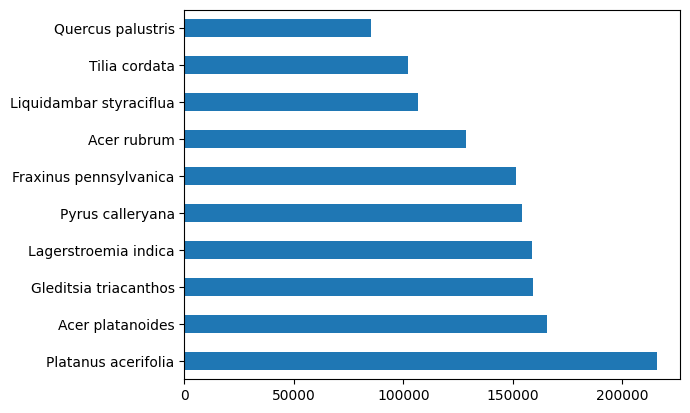

In [76]:
count_species = tree_dataset['scientific_name'].value_counts().sort_values(ascending=False).head(10) # excludes NA by default
#count_species = count_species.iloc[::-1]
count_species.plot(kind='barh')

In [96]:
unique_values, counts = list(count_species.index), list(count_species.values[:, 0])  # Names of unique values
#counts = count_species.values  # Corresponding counts

In [97]:
print(unique_values)
print(counts)

['Platanus acerifolia', 'Acer platanoides', 'Gleditsia triacanthos', 'Lagerstroemia indica', 'Pyrus calleryana', 'Fraxinus pennsylvanica', 'Acer rubrum', 'Liquidambar styraciflua', 'Tilia cordata', 'Quercus palustris']
[215835, 165856, 159421, 158563, 154024, 151654, 128831, 106776, 102277, 85185]


In [98]:
header = ['name', 'count']

with open('barchart_1.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    for i in range(len(unique_values)):
      data = [unique_values[i], counts[i]]

      # write the data
      writer.writerow(data)

In [24]:
tree_dataset['state'].value_counts()

California              1973368
New York                 880838
Colorado                 358448
Texas                    250690
Oregon                   218602
District of Columbia     190942
Minnesota                190766
Washington               165623
Ohio                     151937
Wisconsin                128302
Maryland                 121296
Missouri                  83593
South Dakota              62714
Florida                   60520
Pennsylvania              45603
Kansas                    45148
Georgia                   41307
Nevada                    39193
Kentucky                  32711
Rhode Island              24497
North Carolina            22619
Michigan                  20963
Iowa                      16875
Hawaii                    15440
Tennessee                 12059
Oklahoma                  10000
New Mexico                 2502
Virginia                   1820
Massachusetts              1333
Arizona                     212
Name: state, dtype: int64

In [25]:
null_trees = tree_dataset.loc[tree_dataset['state'].isnull()]
print(null_trees)

Empty DataFrame
Columns: [most_recent_observation, most_recent_observation_type, common_name, scientific_name, city, state, longitude_coordinate, latitude_coordinate, address, condition, native, diameter_breast_height_binned_CM, greater_metro, city_ID, location_type, diameter_breast_height_CM]
Index: []


In [26]:
california_trees = tree_dataset.loc[tree_dataset['state']=='California']

In [27]:
california_trees['city'].value_counts()

Los Angeles         712405
San Jose            347669
San Diego           212304
San Francisco       187231
Stockton             98300
Sacramento           87191
Rancho Cucamonga     80723
Anaheim              77034
Ontario              58577
Huntington Beach     55828
Oakland              35568
Garden Grove         17522
Santa Rosa            3016
Name: city, dtype: int64

In [28]:
top_cities = ['Los Angeles', 'San Jose', 'San Diego', 'San Francisco', 'Stockton']
top_cities_trees = california_trees.loc[california_trees['city'].isin(top_cities)]

In [29]:
top_species = ['Platanus acerifolia', 'Lagerstroemia indica', 'Acer platanoides', 'Gleditsia triacanthos', 'Pyrus calleryana']
top_cities_top_trees = top_cities_trees.loc[top_cities_trees['scientific_name'].isin(top_species)]

In [30]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in top_cities:
    tree_counts.append(top_cities_top_trees.loc[(top_cities_top_trees['scientific_name'] == species) & (top_cities_top_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(top_cities)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

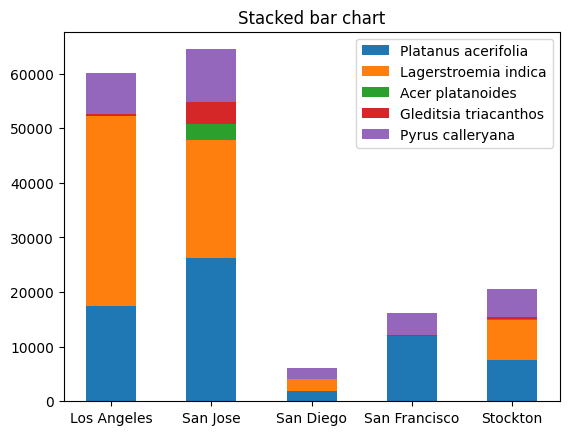

In [31]:
cities = tuple(top_cities)

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")

plt.show()

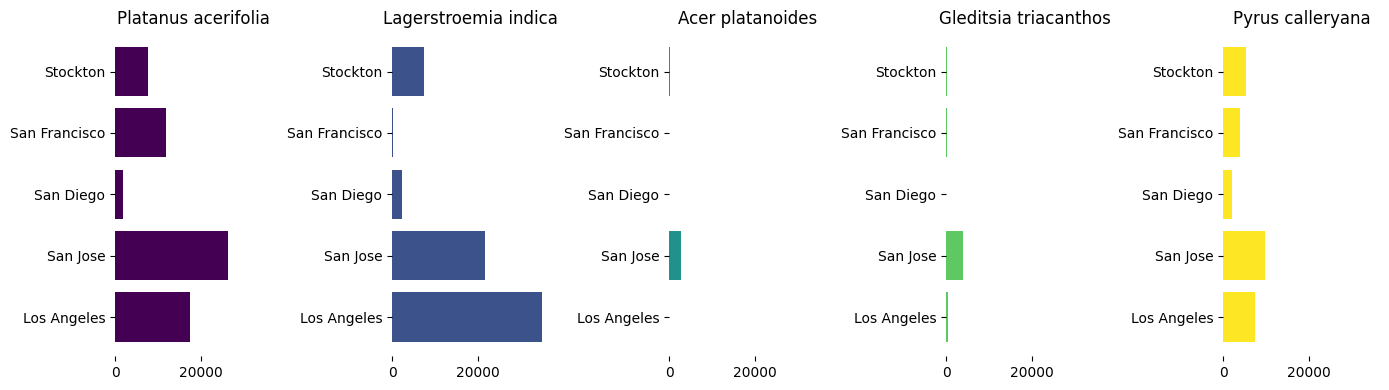

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

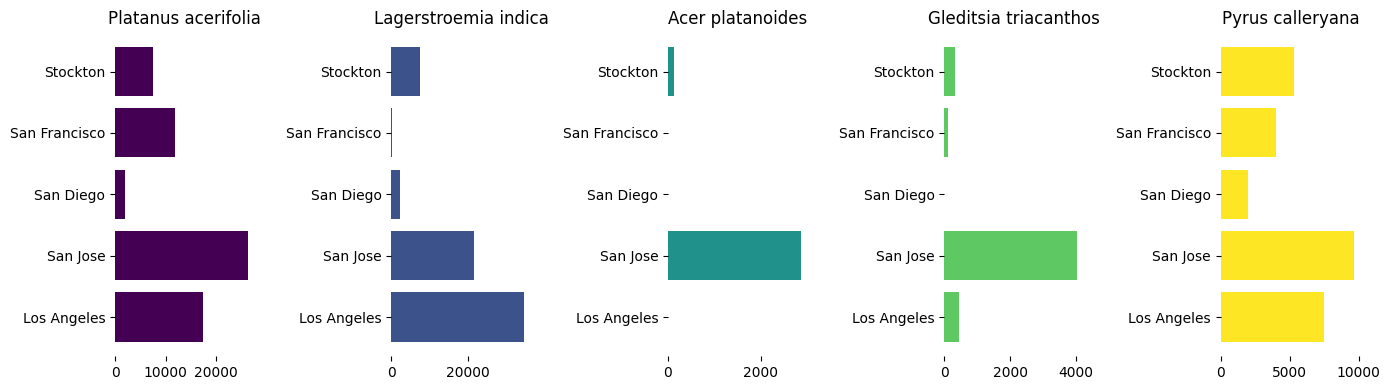

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

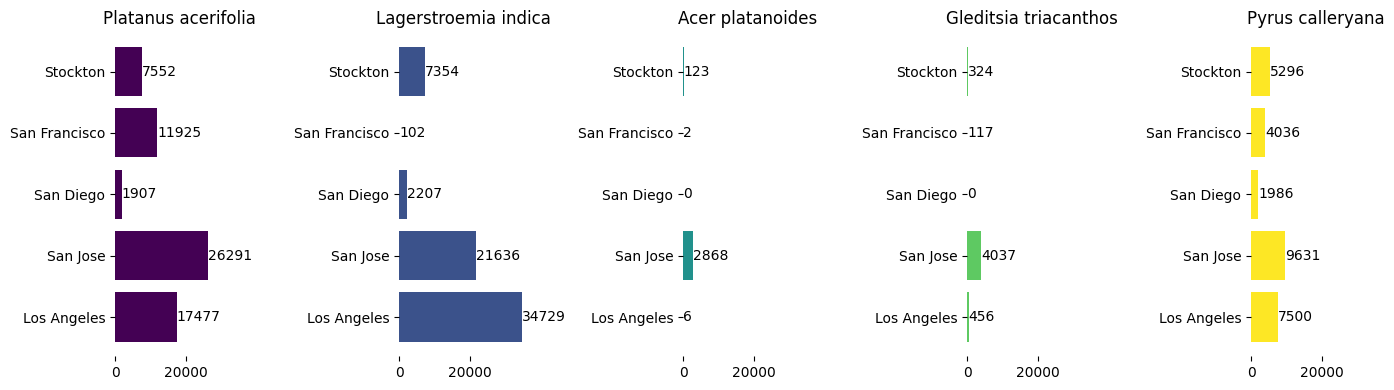

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)
        ax.text(count, j, str(count), ha='left', va='center', color='black')

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()